In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [6]:
df_raw = pd.read_csv("data/titanic.csv")
df_raw

,DataID,PassagierId,Überlebt,Beförderungsklasse,Geschlecht,Alter,Anzahl der Geschwister oder Ehepartner,Anzahl der Eltern oder Kinder,Ticketpreis
0,0,1,0,3,male,22.0,1,0,7.2500
1,1,2,1,1,female,38.0,1,0,71.2833
2,2,3,1,3,female,26.0,0,0,7.9250
3,3,4,1,1,female,35.0,1,0,53.1000
4,4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,male,27.0,0,0,13.0000
887,887,888,1,1,female,19.0,0,0,30.0000
888,888,889,0,3,female,NaN,1,2,23.4500
889,889,890,1,1,male,26.0,0,0,30.0000


In [7]:
df_raw.describe()

,DataID,PassagierId,Überlebt,Beförderungsklasse,Alter,Anzahl der Geschwister oder Ehepartner,Anzahl der Eltern oder Kinder,Ticketpreis
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DataID                                  891 non-null    int64  
 1   PassagierId                             891 non-null    int64  
 2   Überlebt                                891 non-null    int64  
 3   Beförderungsklasse                      891 non-null    int64  
 4   Geschlecht                              891 non-null    object 
 5   Alter                                   714 non-null    float64
 6   Anzahl der Geschwister oder Ehepartner  891 non-null    int64  
 7   Anzahl der Eltern oder Kinder           891 non-null    int64  
 8   Ticketpreis                             891 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


- Das Geschlecht wird nicht ausgewertet, weil es weder numerisch noch ein String ist.
  - Es sollte hierbei [one-hot-encoded](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) werden, da keine Rangordnung zwischen den Geschlechter existiert
- Beim Alter existieren einige null Werte
  - Es ist zudem als float angegeben -> Diese Präzision ist nicht notwendig
  - Die fehlenden Werte sollten ersetzt werden
- Die IDs sind für die Erstellung eines Modells irrelevant

In [21]:
# Drop id columns
df = df_raw.drop("DataID", 1)
df = df.drop("PassagierId", 1)

# Replace missing columns with means
column_means = df.mean()
df = df.fillna(column_means)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Überlebt                                891 non-null    int64  
 1   Beförderungsklasse                      891 non-null    int64  
 2   Geschlecht                              891 non-null    object 
 3   Alter                                   891 non-null    float64
 4   Anzahl der Geschwister oder Ehepartner  891 non-null    int64  
 5   Anzahl der Eltern oder Kinder           891 non-null    int64  
 6   Ticketpreis                             891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [22]:
# Convert age from float to integer
df["Alter"] = df["Alter"].astype(int)
df

,Überlebt,Beförderungsklasse,Geschlecht,Alter,Anzahl der Geschwister oder Ehepartner,Anzahl der Eltern oder Kinder,Ticketpreis
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000
887,1,1,female,19,0,0,30.0000
888,0,3,female,29,1,2,23.4500
889,1,1,male,26,0,0,30.0000


In [30]:
# Cast gender to string type
df["Geschlecht"] = df["Geschlecht"].astype('str') 
df.info()
# Integer encode string (one-hot-encoding might better)
df["Geschlecht"] = df["Geschlecht"].replace({"b'0'": 0, "b'1'": 1})
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Überlebt                                891 non-null    int64  
 1   Beförderungsklasse                      891 non-null    int64  
 2   Geschlecht                              891 non-null    object 
 3   Alter                                   891 non-null    int32  
 4   Anzahl der Geschwister oder Ehepartner  891 non-null    int64  
 5   Anzahl der Eltern oder Kinder           891 non-null    int64  
 6   Ticketpreis                             891 non-null    float64
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.4+ KB


,Überlebt,Beförderungsklasse,Geschlecht,Alter,Anzahl der Geschwister oder Ehepartner,Anzahl der Eltern oder Kinder,Ticketpreis
0,0,3,0,22,1,0,7.2500
1,1,1,1,38,1,0,71.2833
2,1,3,1,26,0,0,7.9250
3,1,1,1,35,1,0,53.1000
4,0,3,0,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000
887,1,1,1,19,0,0,30.0000
888,0,3,1,29,1,2,23.4500
889,1,1,0,26,0,0,30.0000


In [48]:
# Get all column names
column_names = []
for col in df.columns: 
    column_names.append(col)
    
column_names_x_values = column_names[1:]
print(column_names_x_values)

['Beförderungsklasse', 'Geschlecht', 'Alter', 'Anzahl der Geschwister oder Ehepartner', 'Anzahl der Eltern oder Kinder', 'Ticketpreis']


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(df[column_names_x_values], df['Überlebt'], random_state=0)


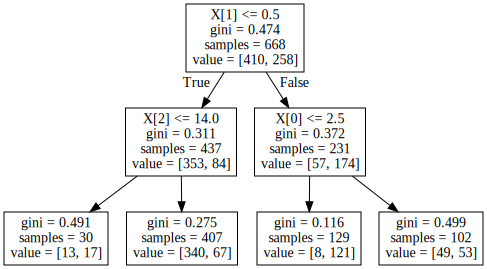

In [76]:
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

# Step 3: Train the model on the data
dt = clf.fit(X_train, Y_train)

# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
clf.predict(X_test)

#clf.plot_tree(clf);

export_graphviz(clf, out_file="mytree123.dot")
with open("mytree123.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [77]:
txt = clf.export_text(dt, column_names_x_values)
print(txt)
clf.plot_tree(dt)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_text'

Weitere Infos zur Visualisierung
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc?gi=17febfec8ef0
- https://mljar.com/blog/visualize-decision-tree/